In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


with open('stata.txt', 'r', encoding='cp1251') as file:
    content = file.read()

content = content.replace('"', '')

lines = content.strip().split('\n')
header = lines[0].split(',')
data = [line.split(',') for line in lines[1:]]

data = pd.DataFrame(data, columns=header)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Количество больничных дней  237 non-null    object
 1   Возраст                     237 non-null    object
 2   Пол                         237 non-null    object
dtypes: object(3)
memory usage: 5.7+ KB


In [2]:
data.rename(columns={'Количество больничных дней':'work_days', 'Возраст': 'age', 'Пол': 'gender'}, inplace=True)
data.work_days = data.work_days.astype(int)
data.age =data.age.astype(int)
data.head()

,work_days,age,gender
0,5,39,Ж
1,4,54,М
2,4,26,М
3,5,42,М
4,4,29,М


**Случай первый:**

- H0: Мужчины пропускают в течение года более 2 рабочих дней  по болезни также как и женщины.
- H1: Мужчины пропускают в течение года более 2 рабочих дней значимо чаще женщин

Проверим распределение

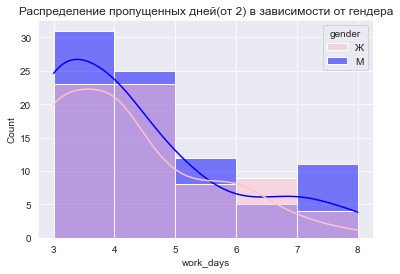

In [3]:
sns.set_style("darkgrid")
sns.histplot(data = data[data.work_days>2], x='work_days', hue="gender",kde = True,binwidth=1, palette=['pink', 'blue'])
plt.title('Распределение пропущенных дней(от 2) в зависимости от гендера')
plt.show()

Видно, что распределения далеки от нормального, поэтому будем использовать U-критерий Манна - Уитни

In [4]:
_,p_value = stats.mannwhitneyu(
    x = data[(data.gender == 'М') & (data.work_days>2)].work_days,
    y = data[(data.gender == 'Ж') & (data.work_days>2)].work_days)
p_value

0.9548173130538878

p_value гораздо больше чем 0.05, а это означает, что утверждение о том, что мужчины пропускают в течение года более 2 рабочих дней значимо чаще женщин мы отвергаем!

**Случай второй:**

- H0: Работники старше 35 лет пропускают в течение года более 2 рабочих дней по болезни также как и свои более молодые коллеги.
- H1: Работники старше 35 лет пропускают в течение года более 2 рабочих дней по болезни значимо чаще своих более молодых коллег.



Проверим распределение

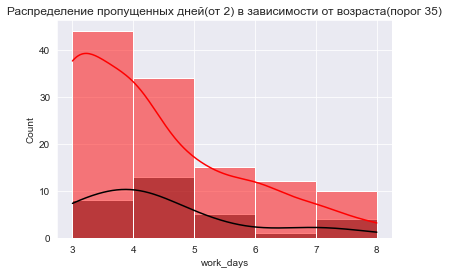

In [7]:
sns.set_style("darkgrid")
sns.histplot(data = data[(data.age<35) & (data.work_days>2)], x="work_days",kde = True,binwidth=1, color = 'black')
sns.histplot(data = data[(data.age>35) & (data.work_days>2)], x="work_days",kde = True,binwidth=1, color = 'red')
plt.title(f'Распределение пропущенных дней(от 2) в зависимости от возраста(порог {35})')
plt.show()

Видно, что распределения далеки от нормального, поэтому будем использовать U-критерий Манна - Уитни

In [6]:
_,p_value = stats.mannwhitneyu(
    x = data[(data.age<35) & (data.work_days>2)].work_days,
    y = data[(data.age>35) & (data.work_days>2)].work_days)
p_value

0.4492324060145413

p_value гораздо больше чем 0.05, а это означает, что гипотезу о том что,работники старше 35 лет пропускают в течение года более 2 рабочих дней по болезни значимо чаще своих более молодых коллег мы отвергаем!

In [9]:
data.describe()

,work_days,age
count,237.000000,237.000000
mean,3.257384,40.181435
std,1.807821,6.875157
min,0.000000,23.000000
25%,2.000000,36.000000
50%,3.000000,41.000000
75%,4.000000,45.000000
max,8.000000,60.000000


In [10]:
data.age.min()

23

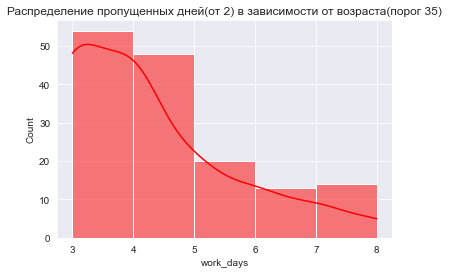

In [11]:
sns.set_style("darkgrid")
sns.histplot(data = data[(data.age<23) & (data.work_days>2)], x="work_days",kde = True,binwidth=1, color = 'black')
sns.histplot(data = data[(data.age>23) & (data.work_days>2)], x="work_days",kde = True,binwidth=1, color = 'red')
plt.title(f'Распределение пропущенных дней(от 2) в зависимости от возраста(порог {35})')
plt.show()